In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [3]:
# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [7]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Models
models = {
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, eval_metric="rmse")
}

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
    print("R²:", r2_score(y_test, y_pred))


AdaBoost Results:
MAE: 0.6497879664773323
RMSE: 0.7838867644198962
R²: 0.5310788695468394

GradientBoosting Results:
MAE: 0.3716425690425596
RMSE: 0.5422152016168362
R²: 0.7756446042829697

XGBoost Results:
MAE: 0.30957335413783094
RMSE: 0.4717943691423984
R²: 0.8301370561019205


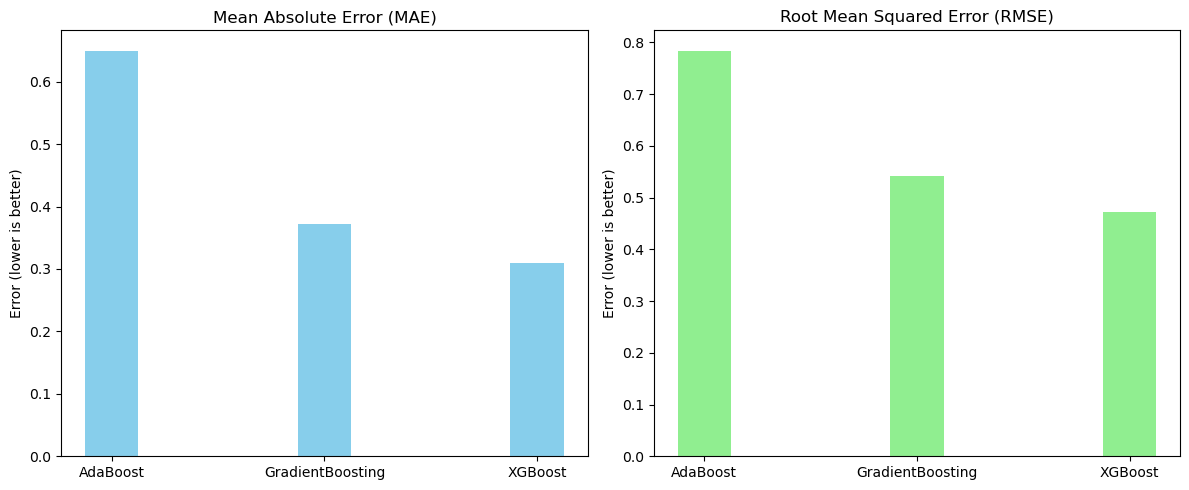

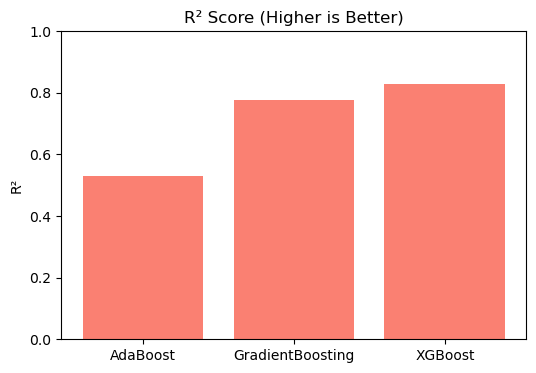

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Results
models = ["AdaBoost", "GradientBoosting", "XGBoost"]
mae = [0.6498, 0.3716, 0.3096]
rmse = [0.7839, 0.5422, 0.4718]
r2 = [0.5311, 0.7756, 0.8301]

x = np.arange(len(models))
width = 0.25

# Plot MAE & RMSE side by side
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# MAE
ax[0].bar(x, mae, width, color="skyblue")
ax[0].set_title("Mean Absolute Error (MAE)")
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].set_ylabel("Error (lower is better)")

# RMSE
ax[1].bar(x, rmse, width, color="lightgreen")
ax[1].set_title("Root Mean Squared Error (RMSE)")
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].set_ylabel("Error (lower is better)")

plt.tight_layout()
plt.show()

# Plot R² separately
plt.figure(figsize=(6,4))
plt.bar(models, r2, color="salmon")
plt.title("R² Score (Higher is Better)")
plt.ylabel("R²")
plt.ylim(0,1)  # because R² ranges from 0 to 1
plt.show()
